# IMPORTATION OF PYTHON PACKAGES

In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import scipy
import re
import string

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from wordcloud import WordCloud

In [5]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download(['omw-1.4',
               'wordnet',
              'punkt',
              'vader_lexicon'])
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package omw-1.4 to C:\Users\Veronica
[nltk_data]     Jimoh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Veronica
[nltk_data]     Jimoh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Veronica
[nltk_data]     Jimoh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Veronica
[nltk_data]     Jimoh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
#Read our dataset into pandas Dataframe
#Note: Pandas was unable to read the cvs due to encoding error hence, why we set the encoding to latin.
df = pd.read_csv('tourist_accommodation_reviews.csv', encoding = 'latin', skipinitialspace = True) 

In [7]:
df.head()

ID               Review Date Location  \
0  rn579778340      Reviewed 1 week ago     Kathu   
1  rn576350875     Reviewed 3 weeks ago     Kathu   
2  rn574921678     Reviewed 4 weeks ago     Kathu   
3  rn572905503  Reviewed April 12, 2018     Kathu   
4  rn572364712  Reviewed April 10, 2018     Kathu   

           Hotel/Restaurant name  \
0  Thong Dee The Kathu Brasserie   
1  Thong Dee The Kathu Brasserie   
2  Thong Dee The Kathu Brasserie   
3  Thong Dee The Kathu Brasserie   
4  Thong Dee The Kathu Brasserie   

                                              Review  
0  Just been for sunday roast lamb and beef truly...  
1  Quietly set off the main road, nice atmosphere...  
2  I made a reservation for a birthday two days i...  
3  We visit here regularly and never fail to be i...  
4  Visited this wonderful place on my travels and...

In [8]:
df.shape

(53644, 5)

In [9]:
frequentDF = df.groupby(['Location']).count().sort_values(by=['ID'], ascending =False)
frequentDF['Hotel/Restaurant name'] 

Location
Patong              16403
Karon                5826
Kata Beach           5752
Rawai                3811
Choeng Thale         3378
Phuket Town          3356
Kamala               3162
Mai Khao             2372
Cape Panwa           1500
Chalong              1287
Thalang District     1177
Kathu                1078
Nai Yang              996
Nai Harn              881
Bang Tao Beach        600
Karon Beach           397
Wichit                395
Talat Yai             300
Koh Kaew              293
Kata Noi Beach        200
Pa Khlok              100
Ratsada                98
Talat Nuea             97
Nai Thon               94
Sakhu                  91
Name: Hotel/Restaurant name, dtype: int64

# WE SELECT THE 30 PREFERRED HOTELS BY LOCATION

In [10]:
newDF = df[df['Location'] == 'Patong']
newDF

ID             Review Date Location   Hotel/Restaurant name  \
793    rn578272599   Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
794    rn576707124   Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
795    rn576151146   Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
796    rn575977118   Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
797    rn574931000   Reviewed 4 weeks ago    Patong  Sam's Steaks and Grill   
...            ...                     ...      ...                     ...   
53639  rn162368197  Reviewed May 29, 2013    Patong                 Bite in   
53640  rn161843734  Reviewed May 25, 2013    Patong                 Bite in   
53641  rn161734077  Reviewed May 24, 2013    Patong                 Bite in   
53642  rn161218072  Reviewed May 19, 2013    Patong                 Bite in   
53643  rn161212765  Reviewed May 19, 2013    Patong                 Bite in   

                                                  Review  
793    its very expensive in comparison to other loca...  
794    We walked passed the holiday inn and decided a...  
795    An atmosphere of the 70's, great comfort of th...  
796    We made a reservation at the last minute to di...  
797    We had a very great time to celebrate my son b...  
...                                                  ...  
53639  I love this small restaurant, for the great fo...  
53640  We stopped at this restaurant after shopping a...  
53641  Great times ,This is one of the best restauran...  
53642  Bite in, it has become my favorite restaurant ...  
53643  The restaurant put in a good location in Jungc...  

[16403 rows x 5 columns]

In [11]:
#We select 30 unique hotels for our choen location
UniqueDf = newDF.drop_duplicates(subset=['Hotel/Restaurant name'])['Hotel/Restaurant name'].head(30). \
                                        reset_index(name='Hotel/Restaurant').drop('index', axis=1)
UniqueDf

Hotel/Restaurant
0                     Sam's Steaks and Grill
1        Highway Curry Indian & Thai Cuisine
2           Ao Chalong Yacht Club Restaurant
3                      Naughty Nuri's Phuket
4              Natural Efe Macrobiotic World
5                  Sizzle Rooftop Restaurant
6                           Climax on Bangla
7                         Le Brooklyn Patong
8                   La Dolce Vita Restaurant
9                               i-Kroon Cafe
10                 Salute Italian Restaurant
11                     Rustic - Eatery & Bar
12                Austrian Garden Restaurant
13                   Trattoria Capri da Rico
14                                     Vista
15              The Blue Mango Bar and Grill
16                                 La Gritta
17  Sandwich Shoppe Cafe & Bar Patong Phuket
18                  Halfway Inn (Restaurant)
19                     ICC Indian Curry Club
20           Rosco's Restaurant & Sports Bar
21         BYD Lofts Restaurant Bistro & Bar
22                 Home Dining Cafe & Lounge
23             Soul Curry Restaurant and Bar
24      Kantok Restaurant at Burasari Resort
25                   Poo Nurntong Restaurant
26                       EuroThai Restaurant
27                       No 9 2nd Restaurant
28                        Pizzeria Da Moreno
29                        YamThai Restaurant

In [12]:
#We select every other hotels based on the uniquely selected 30 
Hotel_DF = newDF[newDF['Hotel/Restaurant name'].isin(UniqueDf['Hotel/Restaurant'])]
Hotel_DF

ID                 Review Date Location  \
793    rn578272599       Reviewed 2 weeks ago    Patong   
794    rn576707124       Reviewed 2 weeks ago    Patong   
795    rn576151146       Reviewed 3 weeks ago    Patong   
796    rn575977118       Reviewed 3 weeks ago    Patong   
797    rn574931000       Reviewed 4 weeks ago    Patong   
...            ...                         ...      ...   
11003  rn535287593  Reviewed October 23, 2017    Patong   
11004  rn535281383  Reviewed October 23, 2017    Patong   
11005  rn535087530  Reviewed October 22, 2017    Patong   
11006  rn535084035  Reviewed October 22, 2017    Patong   
11007  rn534774618  Reviewed October 21, 2017    Patong   

        Hotel/Restaurant name  \
793    Sam's Steaks and Grill   
794    Sam's Steaks and Grill   
795    Sam's Steaks and Grill   
796    Sam's Steaks and Grill   
797    Sam's Steaks and Grill   
...                       ...   
11003      YamThai Restaurant   
11004      YamThai Restaurant   
11005      YamThai Restaurant   
11006      YamThai Restaurant   
11007      YamThai Restaurant   

                                                  Review  
793    its very expensive in comparison to other loca...  
794    We walked passed the holiday inn and decided a...  
795    An atmosphere of the 70's, great comfort of th...  
796    We made a reservation at the last minute to di...  
797    We had a very great time to celebrate my son b...  
...                                                  ...  
11003  Think about this restaurant YamThai when you w...  
11004  Me and my friend had very delicious food in th...  
11005  We wanted to try a few local dishes, so the Th...  
11006  The food is very very poor. The usual Thai fla...  
11007  Just across from the Horizon hotel you will fi...  

[2980 rows x 5 columns]

# EXPLORATORY DATA  ANALYSIS

In [13]:
Hotel_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 793 to 11007
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     2980 non-null   object
 1   Review Date            2980 non-null   object
 2   Location               2980 non-null   object
 3   Hotel/Restaurant name  2980 non-null   object
 4   Review                 2980 non-null   object
dtypes: object(5)
memory usage: 139.7+ KB


In [14]:
Hotel_DF.describe()

ID            Review Date Location   Hotel/Restaurant name  \
count          2980                   2980     2980                    2980   
unique         2930                    719        1                      30   
top     rn562370602  Reviewed 4 weeks ago    Patong  Sam's Steaks and Grill   
freq              4                     68     2980                     100   

                                                   Review  
count                                                2980  
unique                                               2930  
top     Really lovely burger place with a variation of...  
freq                                                    4

In [15]:
Hotel_DF.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [16]:
Hotel_DF['Hotel/Restaurant name'].value_counts().count()

30

In [17]:
Hotel_DF['Hotel/Restaurant name'].count()

2980

In [18]:
#We get the lenght of each reviews
Hotel_DF['Review_length'] = Hotel_DF['Review'].apply(len)
print(Hotel_DF.shape)
Hotel_DF.head()

(2980, 6)


ID            Review Date Location   Hotel/Restaurant name  \
793  rn578272599  Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
794  rn576707124  Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
795  rn576151146  Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
796  rn575977118  Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
797  rn574931000  Reviewed 4 weeks ago    Patong  Sam's Steaks and Grill   

                                                Review  Review_length  
793  its very expensive in comparison to other loca...            262  
794  We walked passed the holiday inn and decided a...            234  
795  An atmosphere of the 70's, great comfort of th...            294  
796  We made a reservation at the last minute to di...            257  
797  We had a very great time to celebrate my son b...            165

In [19]:
Hotel_DF['Review_length'].describe()

count    2980.000000
mean      217.160403
std        69.907879
min       100.000000
25%       173.000000
50%       234.000000
75%       254.000000
max      1166.000000
Name: Review_length, dtype: float64

In [20]:
#Most frequent hotel/Restaurant bar plot
fig = px.bar(frequentDF['Hotel/Restaurant name'].head(10), title='10 Most Visited Hotels by Location', color=frequentDF['Hotel/Restaurant name'].head(10), color_continuous_scale=px.colors.sequential.Magenta)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=0, plot_bgcolor='white', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>Number of visit: %{y}')
fig.show()

<AxesSubplot:xlabel='Review_length', ylabel='Density'>

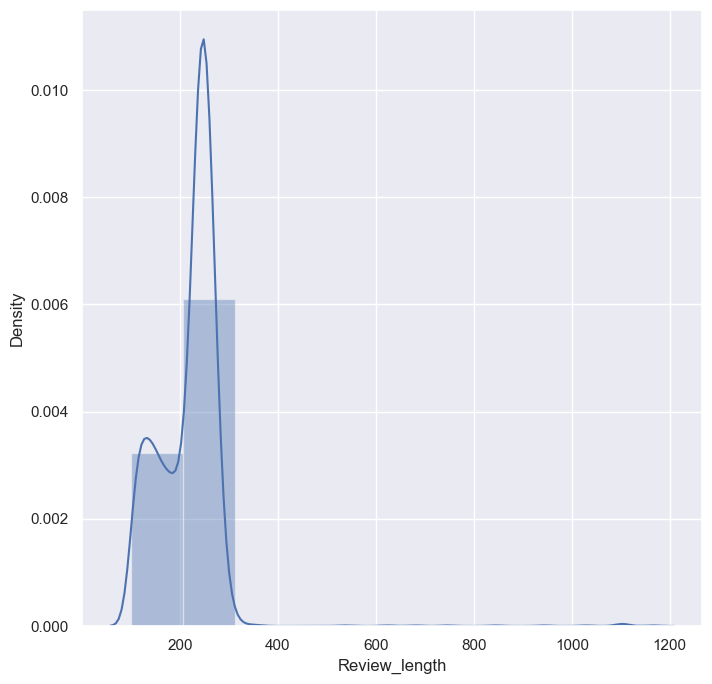

In [21]:
#A distplot of the Review_lenght
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(Hotel_DF['Review_length'] ,hist=True, bins=10)

# TEXT MINING (Text Preprocessing)

In [22]:
text_preprocessingDF = Hotel_DF.copy()

WE REMOVE ALL PUNCTUATION FROM THE REVIEWS

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def punctuation_removal(review_text):
    new_list = [char for char in review_text if char not in string.punctuation]
    new_text = ''.join(new_list)
    return new_text

In [25]:
text_preprocessingDF['Review'] = text_preprocessingDF['Review'].apply(punctuation_removal)
text_preprocessingDF['Review'].head()

793    its very expensive in comparison to other loca...
794    We walked passed the holiday inn and decided a...
795    An atmosphere of the 70s great comfort of the ...
796    We made a reservation at the last minute to di...
797    We had a very great time to celebrate my son b...
Name: Review, dtype: object

WE REMOVE ALL STOP_WORDS FROM THE REVIEWS 

In [26]:
stop = STOP_WORDS

In [27]:
stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words)

['perhaps', 'must', 'ours', 'nor', 'top', '’re', 'us', 'sixty', 'to', 'already', 'serious', 'whither', 'now', 'thus', 'together', 'anywhere', 'every', 'ten', 'noone', 'will', 'anyway', 'ca', 'from', '‘ll', 'seemed', 'therefore', 'whereupon', 'because', 'here', 'afterwards', 'always', 'nevertheless', 'before', 'has', 'and', 'cannot', 'toward', 'still', 'whole', 'those', 'all', 'but', 'he', 'where', 'does', 'show', 'front', 'latterly', 'hereupon', 'seem', 'put', 'i', 'though', 'she', 'empty', 'six', 'further', 're', 'one', 'only', 'namely', 'it', 'in', 'not', 'other', 'yourself', 'fifteen', 'any', 'more', 'if', 'many', 'be', '‘m', 'this', 'elsewhere', 'hers', 'just', 'mostly', 'something', 'sometime', 'anyhow', 'anyone', 'such', 'off', 'done', 'became', 'beyond', 'former', 'used', 'these', 'an', 'becoming', 'first', 'everything', 'amount', 'whom', 'never', '’ve', 'otherwise', 'five', 'while', 'back', 'too', 'upon', 'could', 'we', 'would', 'which', 'take', 'latter', 'whereafter', 'during'

In [28]:
def stopwords_removal(review_text):
    review_text = word_tokenize(review_text)
    return [word.lower() for word in review_text 
            if word.lower() not in stop_words]

In [29]:
text_preprocessingDF['Review'] = text_preprocessingDF['Review'].apply(stopwords_removal)
text_preprocessingDF['Review'].head()

793    [expensive, comparison, local, restaurants, th...
794    [walked, passed, holiday, inn, decided, minute...
795    [atmosphere, 70s, great, comfort, armchairs, e...
796    [reservation, minute, dine, sams, staying, ho...
797    [great, time, celebrate, son, birthday, trip, ...
Name: Review, dtype: object

WE REMOVE ALL NUMBERS FROM THE REVIEWS

In [30]:
def numbers_removal(text):
    new_text = []
    for i in text:
        if not re.search('\d', i):
            new_text.append(i)
    return ' '.join(new_text)

In [31]:
text_preprocessingDF['Review'] = text_preprocessingDF['Review'].apply(numbers_removal)
text_preprocessingDF['Review'].head()

793    expensive comparison local restaurants thats a...
794    walked passed holiday inn decided minute steak...
795    atmosphere great comfort armchairs efficient s...
796    reservation minute dine sams staying hotel di...
797    great time celebrate son birthday trip phuket ...
Name: Review, dtype: object

WE REMOVE FREQUENT WORDS FROM THE REVIEWS

In [32]:
frequent_words = ['restaurants', 'restaurant', 'trip','phuket', 'hotel', 'thai', 'patong', 'tripadvisor','indian','advisor', 'thailand',
                 'review', 'arrive']

In [33]:
text_preprocessingDF['Review'] = text_preprocessingDF['Review'].\
                                            apply(lambda x: " ".join([i for i in x.split() if i not in frequent_words]))
text_preprocessingDF['Review'].head()

793    expensive comparison local thats apple orange ...
794    walked passed holiday inn decided minute steak...
795    atmosphere great comfort armchairs efficient s...
796    reservation minute dine sams staying didnt f...
797    great time celebrate son birthday service grea...
Name: Review, dtype: object

In [34]:
#We perform split on the reviews so we can apply lemmatization
text_preprocessingDF['Review'] = text_preprocessingDF['Review'].apply(lambda x: x.split())
text_preprocessingDF['Review'].head()

793    [expensive, comparison, local, thats, apple, o...
794    [walked, passed, holiday, inn, decided, minute...
795    [atmosphere, great, comfort, armchairs, effici...
796    [reservation, minute, dine, sams, staying, di...
797    [great, time, celebrate, son, birthday, servic...
Name: Review, dtype: object

WE RETURN WORDS TO THEIR ROOT FORM

In [35]:
lemma = WordNetLemmatizer()

In [36]:
def lem_update(Review_text):
    new_list = []
    for word in Review_text:
        word = lemma.lemmatize(word, pos = 'n')
        word = lemma.lemmatize(word, pos = 'a')
        word = lemma.lemmatize(word, pos = 'v')  
        new_list.append(word) 
    return new_list

In [37]:
text_preprocessingDF['Review'] = text_preprocessingDF['Review'].apply(lem_update)
text_preprocessingDF['Review'].head()

793    [expensive, comparison, local, thats, apple, o...
794    [walk, pass, holiday, inn, decide, minute, ste...
795    [atmosphere, great, comfort, armchair, efficie...
796    [reservation, minute, dine, sams, stay, didn...
797    [great, time, celebrate, son, birthday, servic...
Name: Review, dtype: object

In [38]:
#We joined the splitted lemmatized words
text_preprocessingDF['Review'] = text_preprocessingDF['Review'].apply(lambda x: ' '.join(x))
text_preprocessingDF['Review'].head()

793    expensive comparison local thats apple orange ...
794    walk pass holiday inn decide minute steak dinn...
795    atmosphere great comfort armchair efficient sm...
796    reservation minute dine sams stay didnt feel...
797    great time celebrate son birthday service grea...
Name: Review, dtype: object

# SENTIMENT ANALYSIS

In [39]:
sentiment = SentimentIntensityAnalyzer()

In [40]:
#We get the sentiments polarity our of each reviews
text_preprocessingDF['compound'] =[sentiment.polarity_scores(review)['compound'] for review in text_preprocessingDF['Review']]
text_preprocessingDF['neg'] =[sentiment.polarity_scores(review)['neg'] for review in text_preprocessingDF['Review']]
text_preprocessingDF['neu'] =[sentiment.polarity_scores(review)['neu'] for review in text_preprocessingDF['Review']]
text_preprocessingDF['pos'] =[sentiment.polarity_scores(review)['pos'] for review in text_preprocessingDF['Review']]

In [41]:
text_preprocessingDF.head()

ID            Review Date Location   Hotel/Restaurant name  \
793  rn578272599  Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
794  rn576707124  Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
795  rn576151146  Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
796  rn575977118  Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
797  rn574931000  Reviewed 4 weeks ago    Patong  Sam's Steaks and Grill   

                                                Review  Review_length  \
793  expensive comparison local thats apple orange ...            262   
794  walk pass holiday inn decide minute steak dinn...            234   
795  atmosphere great comfort armchair efficient sm...            294   
796  reservation minute dine sams stay didnt feel...            257   
797  great time celebrate son birthday service grea...            165   

     compound    neg    neu    pos  
793    0.7579  0.000  0.745  0.255  
794    0.7506  0.000  0.714  0.286  
795    0.9818  0.000  0.341  0.659  
796    0.9468  0.057  0.422  0.521  
797    0.9169  0.000  0.402  0.598

In [42]:
text_preprocessingDF[['neu', 'neg', 'pos', 'compound']].describe()

neu          neg          pos     compound
count  2980.000000  2980.000000  2980.000000  2980.000000
mean      0.547092     0.032428     0.420479     0.745894
std       0.164030     0.064113     0.176514     0.310946
min       0.163000     0.000000     0.000000    -0.949300
25%       0.429000     0.000000     0.305000     0.709600
50%       0.531000     0.000000     0.439000     0.868900
75%       0.655000     0.050250     0.549250     0.931300
max       1.000000     0.582000     0.837000     0.989100

# VISUALIZATION OF POLARITY SCORES

<AxesSubplot:xlabel='compound', ylabel='Count'>

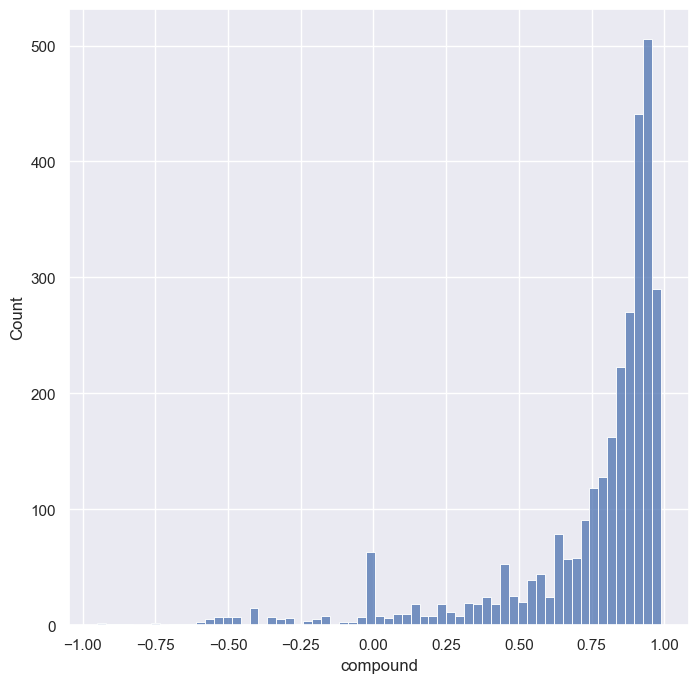

In [43]:
#Histogram plot for the compound score
sns.histplot(text_preprocessingDF['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

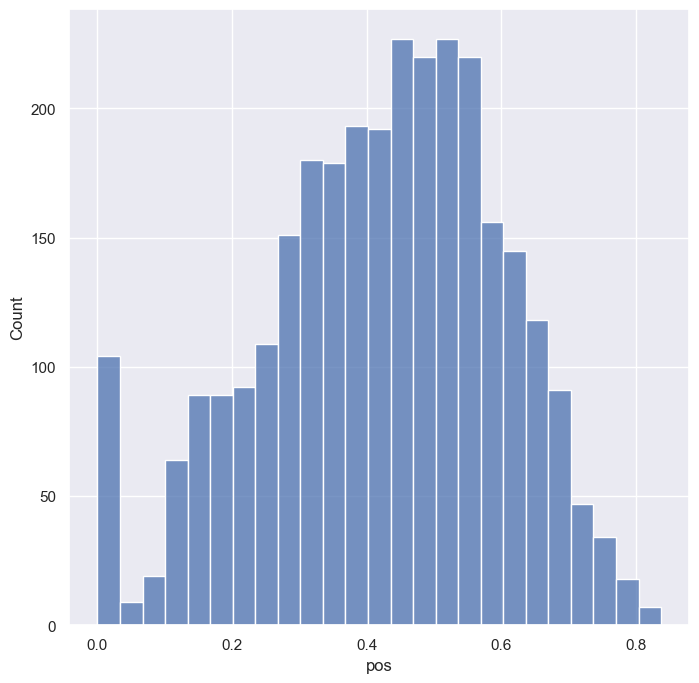

In [44]:
#Histogram plot for the positive score
sns.histplot(text_preprocessingDF['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

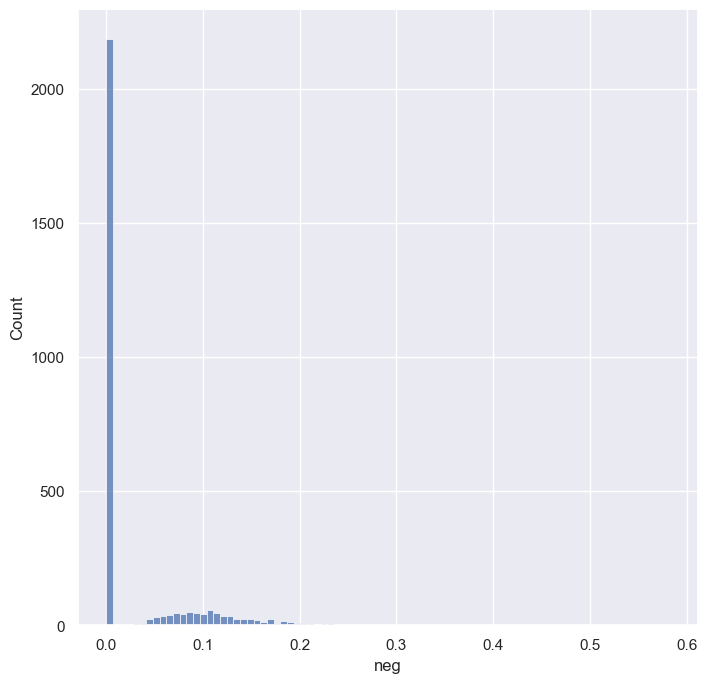

In [45]:
#Histogram plot for the negative score
sns.histplot(text_preprocessingDF['neg'])

# USING THE COMPOUND SCORE OF NEGATIVE <= 0 AND POSITIVE > 0

In [46]:
#We look how negative reviews we have per hotel
(text_preprocessingDF['compound']<=0).groupby(text_preprocessingDF['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Ao Chalong Yacht Club Restaurant             3
Austrian Garden Restaurant                   5
BYD Lofts Restaurant Bistro & Bar            6
Climax on Bangla                             5
EuroThai Restaurant                          8
Halfway Inn (Restaurant)                     9
Highway Curry Indian & Thai Cuisine          4
Home Dining Cafe & Lounge                    6
ICC Indian Curry Club                       17
Kantok Restaurant at Burasari Resort         7
La Dolce Vita Restaurant                     2
La Gritta                                    6
Le Brooklyn Patong                           5
Natural Efe Macrobiotic World                6
Naughty Nuri's Phuket                        6
No 9 2nd Restaurant                          5
Pizzeria Da Moreno                           8
Poo Nurntong Restaurant                      6
Rosco's Restaurant & Sports Bar              7
Rustic - Eatery & Bar                        2
Salute Italian Restaurant             

In [47]:
#Percetage of total reviews
percent_negative = pd.DataFrame((text_preprocessingDF['compound']<=0).groupby(text_preprocessingDF['Hotel/Restaurant name']).sum()
                        /text_preprocessingDF['Hotel/Restaurant name'].\
                                groupby(text_preprocessingDF['Hotel/Restaurant name']).count()*100,
                       columns=['% negaive review']).sort_values(by = '% negaive review')
percent_negative

% negaive review
Hotel/Restaurant name                                     
Sandwich Shoppe Cafe & Bar Patong Phuket          1.000000
Trattoria Capri da Rico                           2.000000
Sam's Steaks and Grill                            2.000000
Rustic - Eatery & Bar                             2.000000
La Dolce Vita Restaurant                          2.000000
Ao Chalong Yacht Club Restaurant                  3.000000
Salute Italian Restaurant                         3.000000
i-Kroon Cafe                                      3.000000
Highway Curry Indian & Thai Cuisine               4.000000
No 9 2nd Restaurant                               5.000000
Climax on Bangla                                  5.000000
Le Brooklyn Patong                                5.376344
Austrian Garden Restaurant                        5.434783
Naughty Nuri's Phuket                             6.000000
Vista                                             6.000000
La Gritta                                         6.000000
Natural Efe Macrobiotic World                     6.000000
YamThai Restaurant                                6.000000
Poo Nurntong Restaurant                           6.000000
Home Dining Cafe & Lounge                         6.000000
Sizzle Rooftop Restaurant                         6.000000
BYD Lofts Restaurant Bistro & Bar                 6.000000
The Blue Mango Bar and Grill                      7.000000
Rosco's Restaurant & Sports Bar                   7.000000
Kantok Restaurant at Burasari Resort              7.000000
Soul Curry Restaurant and Bar                     8.000000
EuroThai Restaurant                               8.000000
Pizzeria Da Moreno                                8.421053
Halfway Inn (Restaurant)                          9.000000
ICC Indian Curry Club                            17.000000

<AxesSubplot:xlabel='% negaive review', ylabel='Hotel/Restaurant name'>

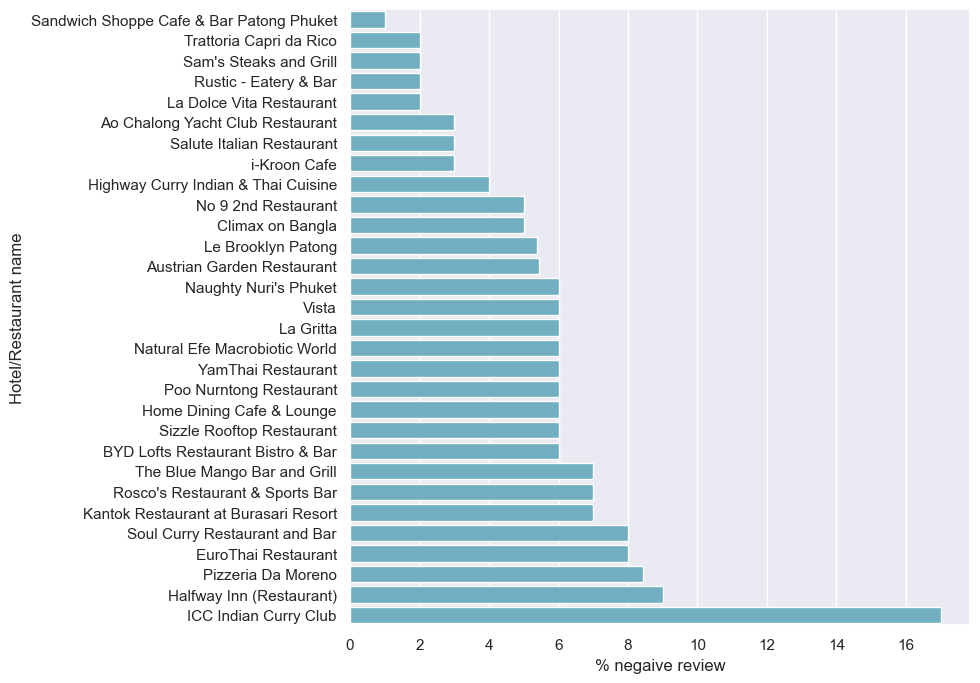

In [48]:
#A PLOT OF THE HOTELS WITH HIGHEST % OF NEGATIVE REVIEW
sns.barplot(data = percent_negative, x = '% negaive review', y= percent_negative.index, color ='c')

In [49]:
#We look how positive reviews we have per hotel
(text_preprocessingDF['compound']>0).groupby(text_preprocessingDF['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Ao Chalong Yacht Club Restaurant            97
Austrian Garden Restaurant                  87
BYD Lofts Restaurant Bistro & Bar           94
Climax on Bangla                            95
EuroThai Restaurant                         92
Halfway Inn (Restaurant)                    91
Highway Curry Indian & Thai Cuisine         96
Home Dining Cafe & Lounge                   94
ICC Indian Curry Club                       83
Kantok Restaurant at Burasari Resort        93
La Dolce Vita Restaurant                    98
La Gritta                                   94
Le Brooklyn Patong                          88
Natural Efe Macrobiotic World               94
Naughty Nuri's Phuket                       94
No 9 2nd Restaurant                         95
Pizzeria Da Moreno                          87
Poo Nurntong Restaurant                     94
Rosco's Restaurant & Sports Bar             93
Rustic - Eatery & Bar                       98
Salute Italian Restaurant             

In [50]:
#Percetage of total reviews
percent_positive = pd.DataFrame((text_preprocessingDF['compound']>0).groupby(text_preprocessingDF['Hotel/Restaurant name']).sum()
                        /text_preprocessingDF['Hotel/Restaurant name'].\
                                groupby(text_preprocessingDF['Hotel/Restaurant name']).count()*100,
                       columns=['% positive review']).sort_values(by = '% positive review')
percent_positive

% positive review
Hotel/Restaurant name                                      
ICC Indian Curry Club                             83.000000
Halfway Inn (Restaurant)                          91.000000
Pizzeria Da Moreno                                91.578947
EuroThai Restaurant                               92.000000
Soul Curry Restaurant and Bar                     92.000000
The Blue Mango Bar and Grill                      93.000000
Rosco's Restaurant & Sports Bar                   93.000000
Kantok Restaurant at Burasari Resort              93.000000
Naughty Nuri's Phuket                             94.000000
Poo Nurntong Restaurant                           94.000000
YamThai Restaurant                                94.000000
Natural Efe Macrobiotic World                     94.000000
Vista                                             94.000000
La Gritta                                         94.000000
Home Dining Cafe & Lounge                         94.000000
BYD Lofts Restaurant Bistro & Bar                 94.000000
Sizzle Rooftop Restaurant                         94.000000
Austrian Garden Restaurant                        94.565217
Le Brooklyn Patong                                94.623656
No 9 2nd Restaurant                               95.000000
Climax on Bangla                                  95.000000
Highway Curry Indian & Thai Cuisine               96.000000
Ao Chalong Yacht Club Restaurant                  97.000000
Salute Italian Restaurant                         97.000000
i-Kroon Cafe                                      97.000000
Sam's Steaks and Grill                            98.000000
Rustic - Eatery & Bar                             98.000000
Trattoria Capri da Rico                           98.000000
La Dolce Vita Restaurant                          98.000000
Sandwich Shoppe Cafe & Bar Patong Phuket          99.000000

<AxesSubplot:xlabel='% positive review', ylabel='Hotel/Restaurant name'>

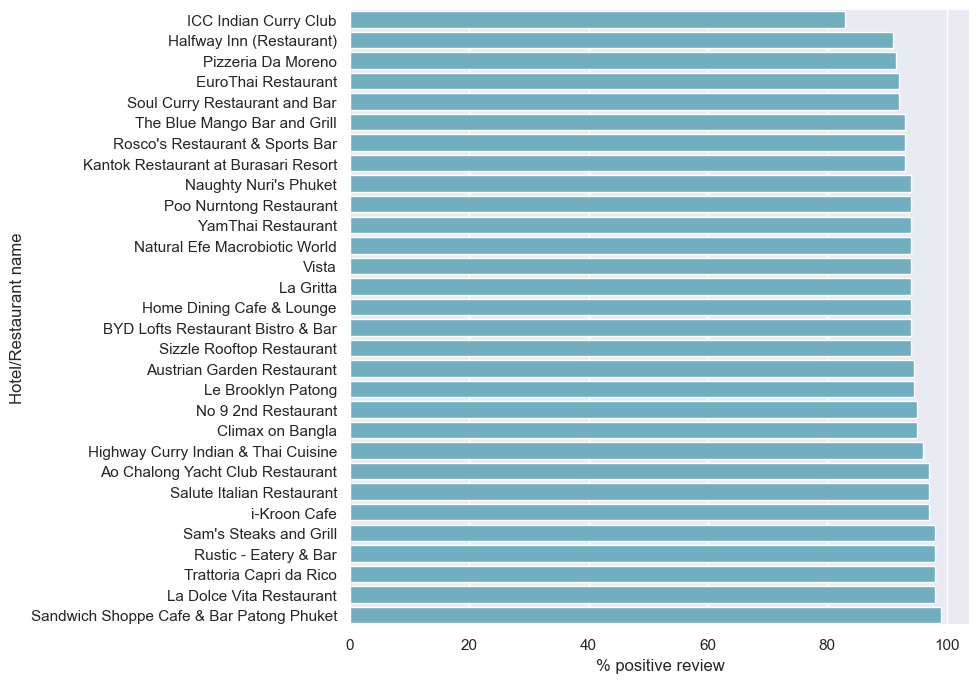

In [51]:
#A PLOT OF THE HOTELS WITH HIGHEST % OF POSITIVE REVIEW
sns.barplot(data = percent_positive, x = '% positive review', y= percent_positive.index, color ='c')

# A QUICK FOCUS ON ONE OF THE HOTEL WITH HIGHEST NEGATIVE & POSITIVE REVIEW.

In [52]:
Review_negative_subset = text_preprocessingDF.loc[(text_preprocessingDF['Hotel/Restaurant name'] == 'ICC Indian Curry Club')
                                                 & (text_preprocessingDF['compound']<=0),:]

Review_positive_subset = text_preprocessingDF.loc[(text_preprocessingDF['Hotel/Restaurant name'] == 'Sandwich Shoppe Cafe & Bar Patong Phuket')
                                                 & (text_preprocessingDF['compound']>0),:]

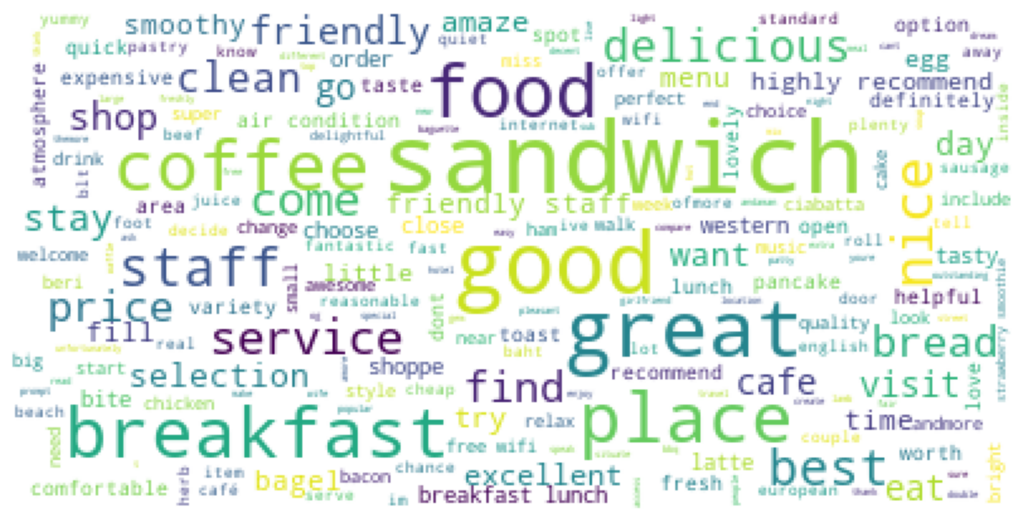

In [53]:
#WORDCLOUD FOR HOTEL/RESTAURANT WITH HIGHEST PERCENTAGE OF POSITIVE REVIEW
Review_positive = []

for review in Review_positive_subset.Review:
    Review_positive.append(review)
Review_positive = ' '.join(Review_positive)
Review_positive[:]

wordcloud = WordCloud(background_color="white",\
                      max_font_size=40, relative_scaling=.5, colormap='viridis').generate(Review_positive)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

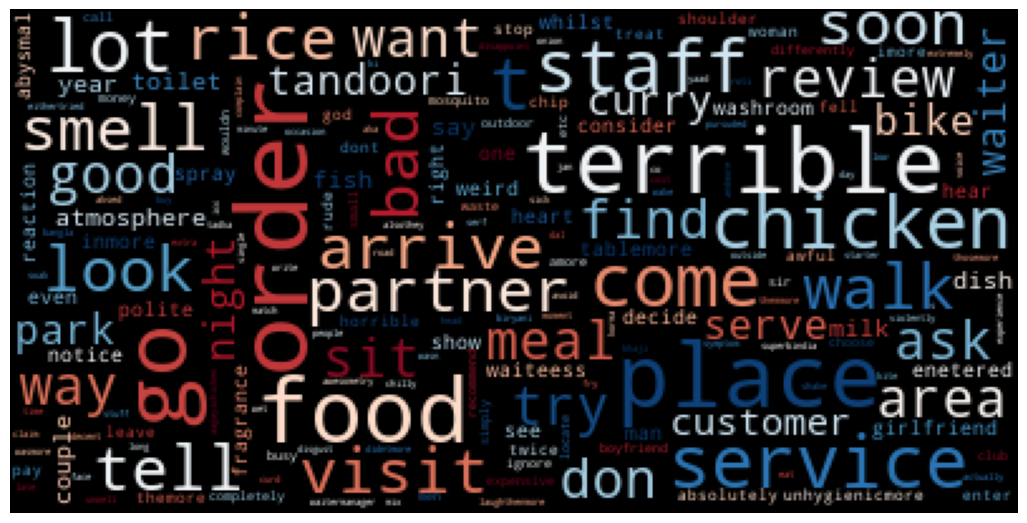

In [54]:
#WORDCLOUD FOR HOTEL/RESTAURANT WITH HIGHEST PERCENTAGE OF NEGATIVE REVIEW
Review_negative = []

for review in Review_negative_subset.Review:
    Review_negative.append(review)
Review_negative = ' '.join(Review_negative)
Review_negative[:]

wordcloud = WordCloud(background_color="black",\
                      max_font_size=40, relative_scaling=.5, colormap='RdBu').generate(Review_negative)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# WE SET COMPOUND > 0.05 AS POSITIVE, COMPOUND =< 0.05 AND > -0.05  AS NEUTRAL AND COMPOUND <= -0.05 AS NEGATIVE. THIS ALLOWS US TO ACCOMMODATE NEUTRAL REVIEWS

In [55]:
def review(x):
    if x['compound'] > 0.05:
        return 'Positive'
    elif x['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [56]:
text_preprocessingDF['Sentiment_reviews'] = text_preprocessingDF[['compound']].apply(review, axis= 1)
text_preprocessingDF.head()

ID            Review Date Location   Hotel/Restaurant name  \
793  rn578272599  Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
794  rn576707124  Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
795  rn576151146  Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
796  rn575977118  Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
797  rn574931000  Reviewed 4 weeks ago    Patong  Sam's Steaks and Grill   

                                                Review  Review_length  \
793  expensive comparison local thats apple orange ...            262   
794  walk pass holiday inn decide minute steak dinn...            234   
795  atmosphere great comfort armchair efficient sm...            294   
796  reservation minute dine sams stay didnt feel...            257   
797  great time celebrate son birthday service grea...            165   

     compound    neg    neu    pos Sentiment_reviews  
793    0.7579  0.000  0.745  0.255          Positive  
794    0.7506  0.000  0.714  0.286          Positive  
795    0.9818  0.000  0.341  0.659          Positive  
796    0.9468  0.057  0.422  0.521          Positive  
797    0.9169  0.000  0.402  0.598          Positive

In [57]:
#Value count of each Sentiment Polarity
text_preprocessingDF['Sentiment_reviews'].value_counts()

Positive    2803
Negative     105
Neutral       72
Name: Sentiment_reviews, dtype: int64

In [58]:
#Visualization of the Sentiment Polarity
fig = go.Figure(data=[go.Pie(labels=['Positive','Negative', 'Neutral'],
                values=text_preprocessingDF['Sentiment_reviews'].value_counts(), title="Sentiment_reviews",titlefont=dict(size=15), textinfo='label+percent', marker=dict(colors=px.colors.sequential.Mint), hole=.4)])
fig.update_layout(margin=dict(t=40, b=40, l=0, r=0), font=dict(size=12), showlegend=True)
fig.show()

# WE CREATE A DATAFRAME FOR ALL THE CLASSIFICATION

In [59]:
#Dataframe of positive reviews
positive_df = text_preprocessingDF[['ID','Review Date', 'Location', 'Hotel/Restaurant name', 'Review', 'Review_length',
                                    'compound',
                                   'pos', 'Sentiment_reviews']][text_preprocessingDF.Sentiment_reviews== 'Positive']
positive_df['% of Positive'] = positive_df['compound']*100
positive_df.head()

ID            Review Date Location   Hotel/Restaurant name  \
793  rn578272599  Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
794  rn576707124  Reviewed 2 weeks ago    Patong  Sam's Steaks and Grill   
795  rn576151146  Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
796  rn575977118  Reviewed 3 weeks ago    Patong  Sam's Steaks and Grill   
797  rn574931000  Reviewed 4 weeks ago    Patong  Sam's Steaks and Grill   

                                                Review  Review_length  \
793  expensive comparison local thats apple orange ...            262   
794  walk pass holiday inn decide minute steak dinn...            234   
795  atmosphere great comfort armchair efficient sm...            294   
796  reservation minute dine sams stay didnt feel...            257   
797  great time celebrate son birthday service grea...            165   

     compound    pos Sentiment_reviews  % of Positive  
793    0.7579  0.255          Positive          75.79  
794    0.7506  0.286          Positive          75.06  
795    0.9818  0.659          Positive          98.18  
796    0.9468  0.521          Positive          94.68  
797    0.9169  0.598          Positive          91.69

In [60]:
#Dataframe of neutral reviews
nuetral_df = text_preprocessingDF[['ID','Review Date', 'Location', 'Hotel/Restaurant name', 'Review', 'Review_length',
                                    'compound',
                                   'neu', 'Sentiment_reviews']][text_preprocessingDF.Sentiment_reviews== 'Neutral']
nuetral_df['% of Neutral'] = nuetral_df['compound']*100
nuetral_df.head()

ID                  Review Date Location  \
854   rn548453193  Reviewed December 21, 2017    Patong   
1395  rn577855512        Reviewed 2 weeks ago    Patong   
1486  rn536763794   Reviewed October 28, 2017    Patong   
2112  rn550805054    Reviewed January 1, 2018    Patong   
2157  rn399542444      Reviewed July 31, 2016    Patong   

                    Hotel/Restaurant name  \
854                Sam's Steaks and Grill   
1395  Highway Curry Indian & Thai Cuisine   
1486  Highway Curry Indian & Thai Cuisine   
2112     Ao Chalong Yacht Club Restaurant   
2157     Ao Chalong Yacht Club Restaurant   

                                                 Review  Review_length  \
854   fancy escape couple hour place come walk trans...            239   
1395  food twice stay food authentic food taste serv...            125   
1486  tasty authentic taste shahi paneer dal makhni ...            135   
2112                                try even recomended            123   
2157  couldnt handle amaze crispy pork meat cook cri...            263   

      compound    neu Sentiment_reviews  % of Neutral  
854     0.0258  0.784           Neutral          2.58  
1395    0.0000  1.000           Neutral          0.00  
1486    0.0000  1.000           Neutral          0.00  
2112    0.0000  1.000           Neutral          0.00  
2157   -0.0147  0.713           Neutral         -1.47

In [61]:
#Dataframe for negative reviews
negative_df = text_preprocessingDF[['ID','Review Date', 'Location', 'Hotel/Restaurant name', 'Review', 'Review_length',
                                    'compound',
                                   'neg', 'Sentiment_reviews']][text_preprocessingDF.Sentiment_reviews== 'Negative']
negative_df['% of Negative'] = negative_df['compound']*100
negative_df.head()

ID                 Review Date Location  \
848   rn552126319   Reviewed January 6, 2018    Patong   
877   rn536593727  Reviewed October 28, 2017    Patong   
1401  rn575325214       Reviewed 3 weeks ago    Patong   
1446  rn553674899  Reviewed January 13, 2018    Patong   
2203  rn580013520        Reviewed 1 week ago    Patong   

                    Hotel/Restaurant name  \
848                Sam's Steaks and Grill   
877                Sam's Steaks and Grill   
1401  Highway Curry Indian & Thai Cuisine   
1446  Highway Curry Indian & Thai Cuisine   
2203                Naughty Nuri's Phuket   

                                                 Review  Review_length  \
848   return sams year have eat numerous time previ...            260   
877   go dinner walk andall table take busy decide w...            252   
1401  eat opposite ikon patal road high rate place n...            239   
1446  karon hard find vegetarian food menu apperentl...            252   
2203  openning hour clear indicate close day ago wal...            256   

      compound    neg Sentiment_reviews  % of Negative  
848    -0.2960  0.126          Negative         -29.60  
877    -0.4215  0.135          Negative         -42.15  
1401   -0.4717  0.170          Negative         -47.17  
1446   -0.2023  0.157          Negative         -20.23  
2203   -0.2263  0.174          Negative         -22.63

# WORD CLOUD PLOT OF ALL THE SENTIMENT REVIEWS

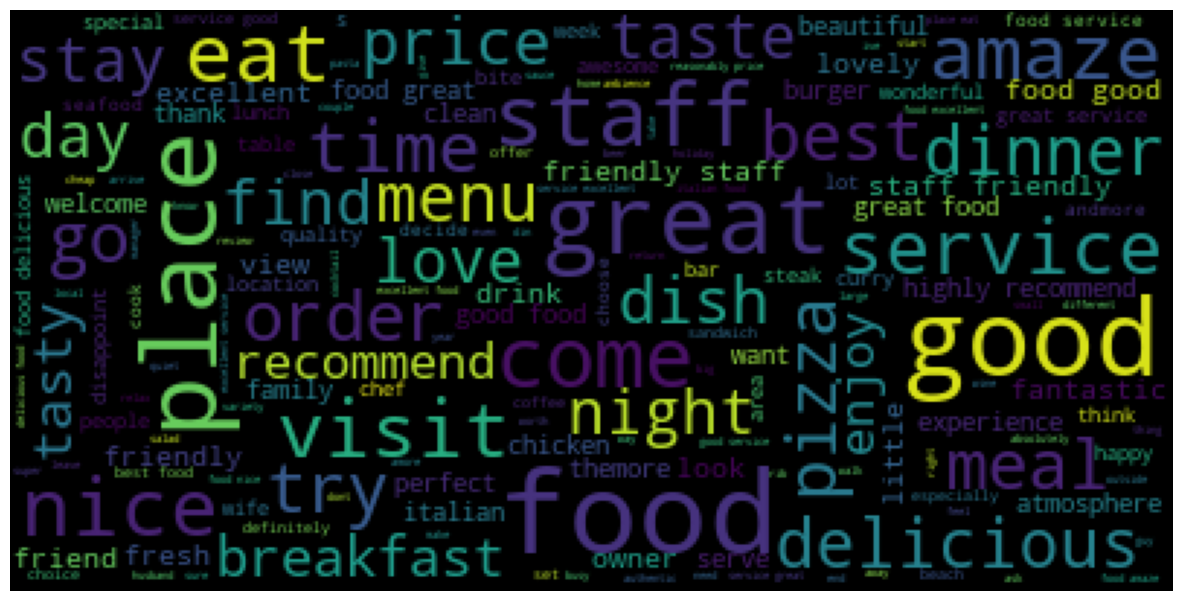

In [62]:
#Positve reviews
positive_words =[]
for review in positive_df.Review:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)

wordcloud = WordCloud(background_color="black",max_words=len(positive_words),\
                      max_font_size=40, relative_scaling=.5, colormap='viridis').generate(positive_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

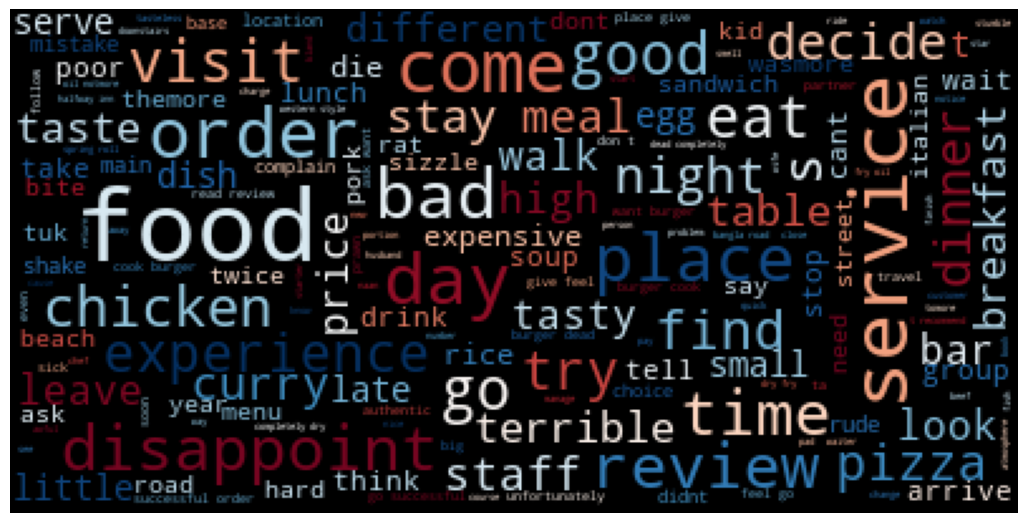

In [63]:
#Negative reivews
negative_words = []

for review in negative_df.Review:
    negative_words.append(review)
negative_words = ' '.join(negative_words)

wordcloud = WordCloud(background_color="black",max_words=len(negative_words),\
                      max_font_size=40, relative_scaling=.5, colormap='RdBu').generate(negative_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

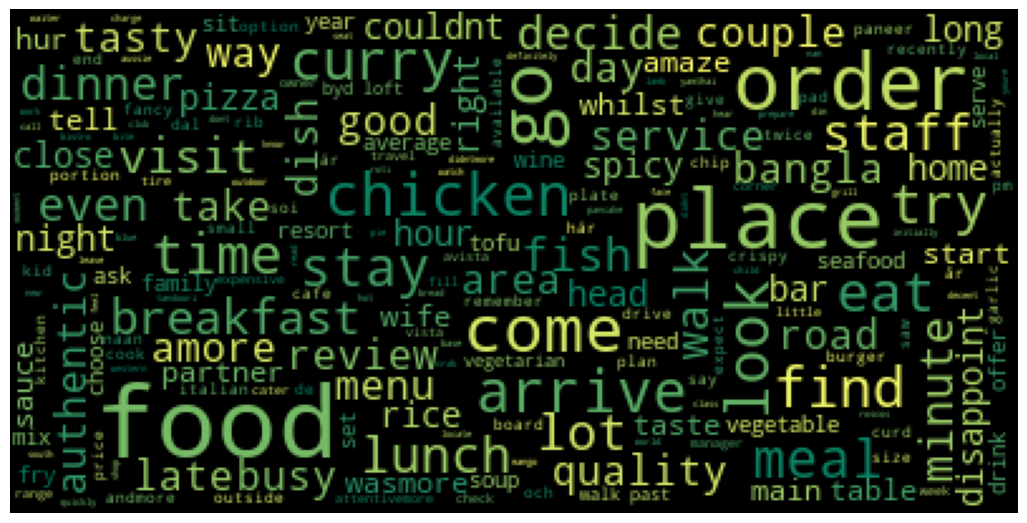

In [64]:
#Neutral reviews
neutral_words = []

for review in nuetral_df.Review:
    neutral_words.append(review)
neutral_words = ' '.join(neutral_words)

wordcloud = WordCloud(background_color="black",max_words=len(neutral_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(neutral_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# PREPROCESSING FOR MODELING

In [65]:
model_df = text_preprocessingDF[['Review', 'Sentiment_reviews']]

In [66]:
model_df

Review Sentiment_reviews
793    expensive comparison local thats apple orange ...          Positive
794    walk pass holiday inn decide minute steak dinn...          Positive
795    atmosphere great comfort armchair efficient sm...          Positive
796    reservation minute dine sams stay didnt feel...          Positive
797    great time celebrate son birthday service grea...          Positive
...                                                  ...               ...
11003  think yamthai want eat seafood good service ch...          Positive
11004  friend delicious food specially food real tast...          Positive
11005  want try local dish food good order prawn dish...          Positive
11006  food poor usual flavour present ask spicy come...          Positive
11007  horizon find little gem great value money amaz...          Positive

[2980 rows x 2 columns]

In [67]:
#CONVERSION OF SENTIMENT REVIEW TO BINARY NUMBERS
def binarization(x):
    if x['Sentiment_reviews'] == 'Positive':
        return 1
    elif x['Sentiment_reviews'] == 'Negative':
        return 2
    else:
        return 0
y = model_df[['Sentiment_reviews']].apply(binarization, axis=1)

In [68]:
y.value_counts()

1    2803
2     105
0      72
dtype: int64

<AxesSubplot:ylabel='count'>

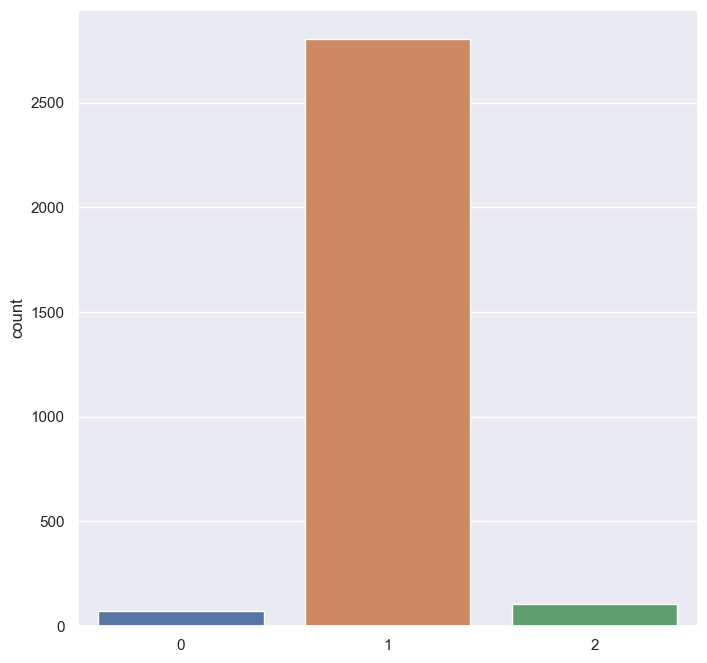

In [69]:
#LABEL COUNT PLOT
sns.countplot(y)

VECTORIZATION (USING BAG OF WORDS)

In [70]:
vectorizer = CountVectorizer()

In [71]:
bow_transformer = vectorizer.fit(model_df['Review'])

In [72]:
print(len(bow_transformer.vocabulary_))

5519


WE TAKE A SAMPLE TEXT REVIEW FROM OUT PREPROCESSED DATA 

In [73]:
Sample_random_text = text_preprocessingDF['Review'][797]
Sample_random_text

'great time celebrate son birthday service great definately come visit futuremore'

In [74]:
#WE TRANSFORM THE SAMPLE TEXT REVIEW 
sample_bow = bow_transformer.transform([Sample_random_text])
print(sample_bow)

  (0, 516)	1
  (0, 771)	1
  (0, 975)	1
  (0, 1257)	1
  (0, 2005)	1
  (0, 2127)	2
  (0, 4309)	1
  (0, 4484)	1
  (0, 4955)	1
  (0, 5248)	1


In [75]:
#WE APPLY THE COUNTER VECTORIZER ON OUR MODEL_DF
vectorized = bow_transformer.transform(model_df['Review'])
print(vectorized)

  (0, 221)	1
  (0, 321)	1
  (0, 413)	1
  (0, 1003)	2
  (0, 1363)	1
  (0, 1543)	1
  (0, 1682)	1
  (0, 1704)	1
  (0, 1870)	1
  (0, 2127)	1
  (0, 2452)	1
  (0, 2800)	1
  (0, 3343)	1
  (0, 3839)	1
  (0, 4065)	1
  (0, 4309)	1
  (0, 4620)	1
  (0, 4882)	1
  (0, 5104)	1
  (0, 5175)	1
  (1, 1239)	1
  (1, 1362)	1
  (1, 1647)	1
  (1, 1658)	1
  (1, 1870)	1
  :	:
  (2978, 1988)	1
  (2978, 2313)	1
  (2978, 2649)	1
  (2978, 2772)	1
  (2978, 2915)	1
  (2978, 3034)	1
  (2978, 3626)	1
  (2978, 3682)	1
  (2978, 3696)	1
  (2978, 3739)	1
  (2978, 4550)	2
  (2978, 4636)	1
  (2978, 4767)	1
  (2978, 4814)	1
  (2978, 5167)	1
  (2979, 149)	1
  (2979, 1810)	1
  (2979, 1870)	1
  (2979, 2030)	1
  (2979, 2127)	2
  (2979, 2334)	1
  (2979, 2791)	1
  (2979, 3072)	1
  (2979, 4309)	1
  (2979, 5175)	1


In [76]:
vectorized.shape

(2980, 5519)

TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY

In [77]:
tf_transformer = TfidfTransformer()

In [78]:
tf_transformed = tf_transformer.fit_transform(vectorized)
print(tf_transformed)

  (0, 5175)	0.17327984336092728
  (0, 5104)	0.22169554690615248
  (0, 4882)	0.21454212663445157
  (0, 4620)	0.15824440853653873
  (0, 4309)	0.07985456988040006
  (0, 4065)	0.2722125831350767
  (0, 3839)	0.14031138507483326
  (0, 3343)	0.23842186204967644
  (0, 2800)	0.16958510873437865
  (0, 2452)	0.18960227139495492
  (0, 2127)	0.08212984309261212
  (0, 1870)	0.055164181160793066
  (0, 1704)	0.20057337688940205
  (0, 1682)	0.16787643579300432
  (0, 1543)	0.2861813328801262
  (0, 1363)	0.23842186204967644
  (0, 1003)	0.5092280794725275
  (0, 413)	0.18757514698089886
  (0, 321)	0.23436409797480232
  (0, 221)	0.2483328477198518
  (1, 5284)	0.19258099679644927
  (1, 4920)	0.19757490403674297
  (1, 4620)	0.39409705454663063
  (1, 4406)	0.3563576792296103
  (1, 3750)	0.13183292128433027
  :	:
  (2978, 3696)	0.18806095964135633
  (2978, 3682)	0.22456167212346367
  (2978, 3626)	0.26569268598033013
  (2978, 3034)	0.27573180289334787
  (2978, 2915)	0.2579057419384667
  (2978, 2772)	0.1222372979

In [79]:
[i for i in bow_transformer.vocabulary_.items()][2:100:10]

[('local', 2800),
 ('value', 5175),
 ('holiday', 2311),
 ('think', 4920),
 ('origin', 3357),
 ('pancake', 3450),
 ('like', 2772),
 ('celebrate', 771),
 ('book', 564),
 ('warm', 5298)]

In [80]:
#WE CONVERT OUT VECTORIZED WORDS INFO A DATAFRAME
X = pd.DataFrame(tf_transformed.toarray(), columns = vectorizer.get_feature_names_out())
X.head()

aa  aagayichicken  abd  abelevable  abide  abit  able  ablemore  aboute  \
0  0.0            0.0  0.0         0.0    0.0   0.0   0.0       0.0     0.0   
1  0.0            0.0  0.0         0.0    0.0   0.0   0.0       0.0     0.0   
2  0.0            0.0  0.0         0.0    0.0   0.0   0.0       0.0     0.0   
3  0.0            0.0  0.0         0.0    0.0   0.0   0.0       0.0     0.0   
4  0.0            0.0  0.0         0.0    0.0   0.0   0.0       0.0     0.0   

   aboutmore  ...  yummymore  yummyyummiest  yung  zen  zero  zim  \
0        0.0  ...        0.0            0.0   0.0  0.0   0.0  0.0   
1        0.0  ...        0.0            0.0   0.0  0.0   0.0  0.0   
2        0.0  ...        0.0            0.0   0.0  0.0   0.0  0.0   
3        0.0  ...        0.0            0.0   0.0  0.0   0.0  0.0   
4        0.0  ...        0.0            0.0   0.0  0.0   0.0  0.0   

   zwiebelrostbraten   är  ätit   år  
0                0.0  0.0   0.0  0.0  
1                0.0  0.0   0.0  0.0  
2                0.0  0.0   0.0  0.0  
3                0.0  0.0   0.0  0.0  
4                0.0  0.0   0.0  0.0  

[5 rows x 5519 columns]

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve

In [82]:
#BALANCING OF CLASS LABELS
oversample = SMOTE()
X, y=  oversample.fit_resample(X,y)

<AxesSubplot:ylabel='count'>

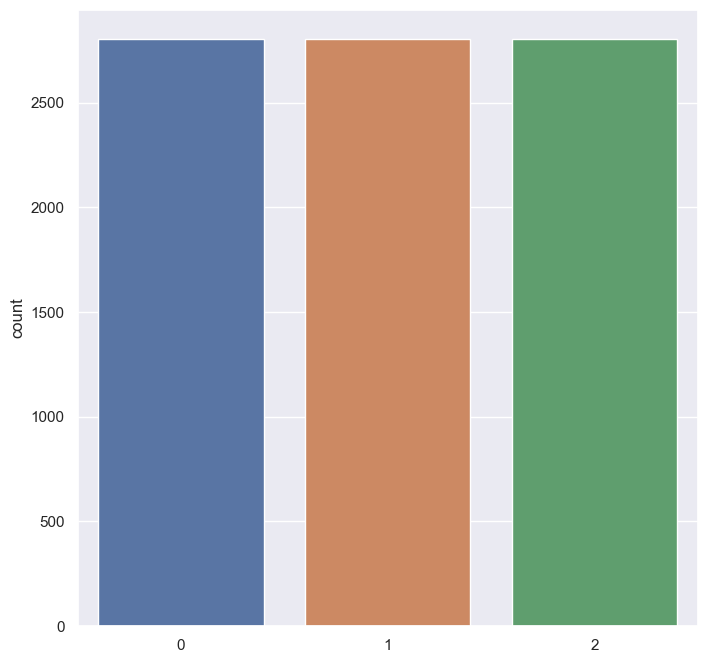

In [83]:
sns.countplot(y)

In [84]:
#We split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =  0.8, test_size = 0.2, random_state = 0)

# MODEL 1 (NAIVE BAYES)

In [85]:
#NAIVE BAYES MODEL
model1 = MultinomialNB()
model1.fit(X_train, y_train)

MultinomialNB()

In [86]:
y_pred1 = model1.predict(X_test)

# MODEL 1 EVALUATION

accuracy:0.98


Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       557
           1       0.99      0.95      0.97       565
           2       0.97      1.00      0.98       560

    accuracy                           0.98      1682
   macro avg       0.98      0.98      0.98      1682
weighted avg       0.98      0.98      0.98      1682



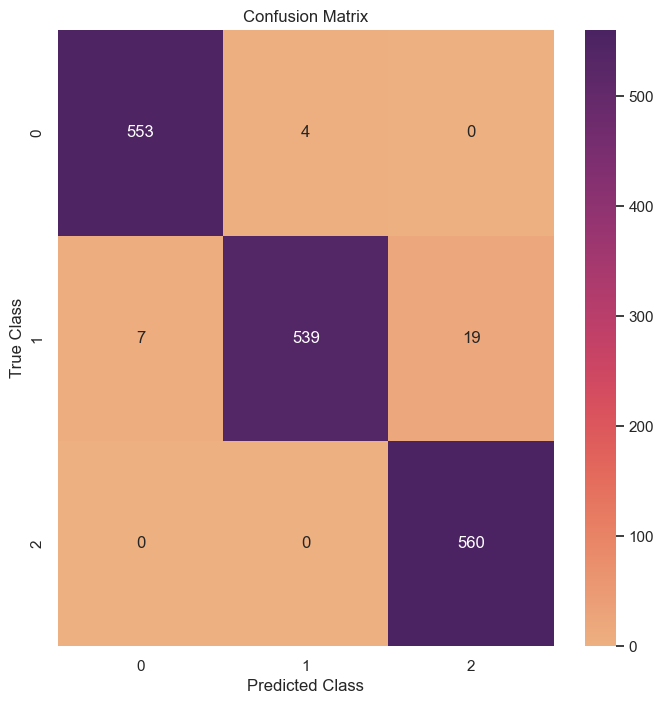

In [93]:
accuracy1 = metrics.accuracy_score(y_test, y_pred1)
print('accuracy:%.2f\n\n' %(accuracy1))
conf_matrix = metrics.confusion_matrix(y_test,y_pred1)
ax = sns.heatmap(conf_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
report = metrics.classification_report(y_test, y_pred1)
print('Classification Report: \n',)
print(report)

<AxesSubplot:title={'center':'ROC Curves - Naive Bayes'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

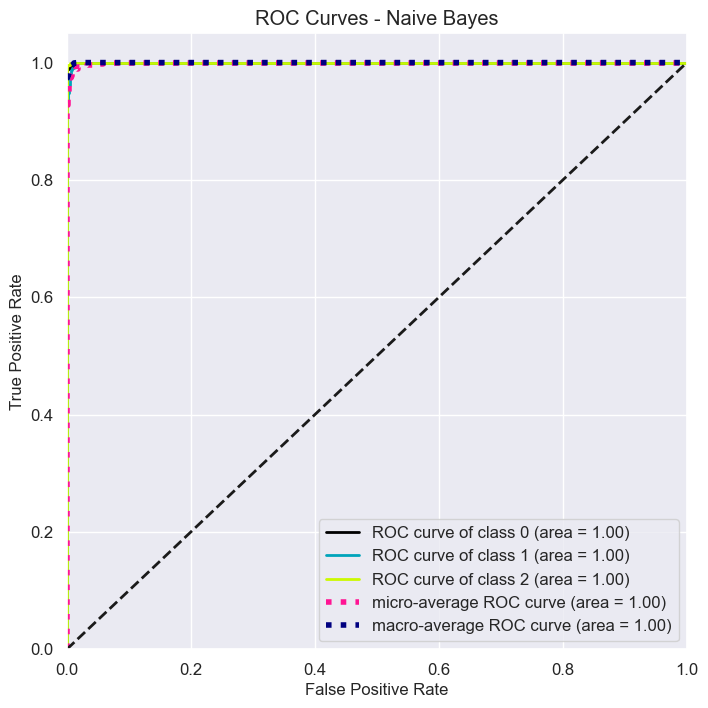

In [88]:
skplt.metrics.plot_roc(y_test, model1.predict_proba(X_test), 
                       title='ROC Curves - Naive Bayes')

# MODEL 2 (RANDOM FOREST CLASSIFIER)

In [89]:
#RANDOM FOREST CLASSIFIER MODEL
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_pred2 = model2.predict(X_test)

# MODEL 2 EVALUATION

accuracy:1.00


Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       557
           1       0.99      1.00      1.00       565
           2       1.00      0.99      1.00       560

    accuracy                           1.00      1682
   macro avg       1.00      1.00      1.00      1682
weighted avg       1.00      1.00      1.00      1682



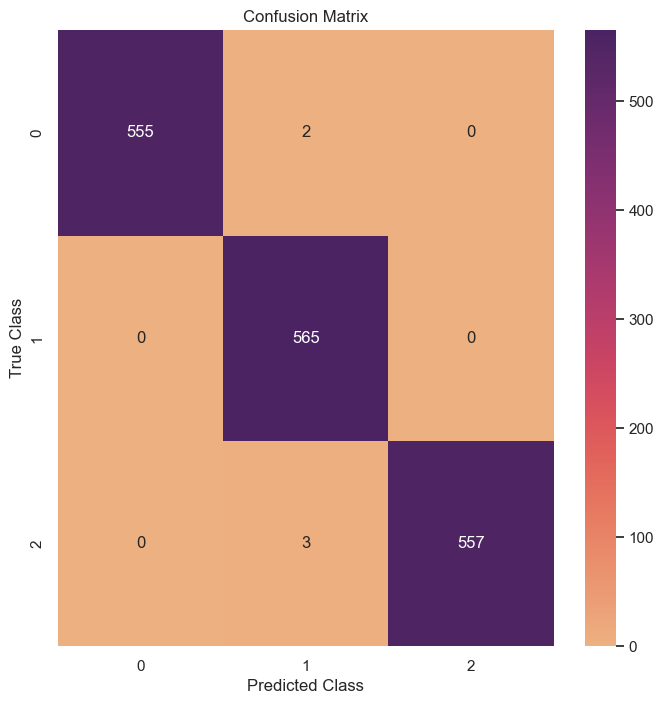

In [91]:
accuracy2 = metrics.accuracy_score(y_test, y_pred2)
print('accuracy:%.2f\n\n' %(accuracy2))
conf_matrix = metrics.confusion_matrix(y_test,y_pred2)
ax = sns.heatmap(conf_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
report = metrics.classification_report(y_test, y_pred2)
print('Classification Report: \n',)
print(report)

<AxesSubplot:title={'center':'ROC Curves - Random Forest'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

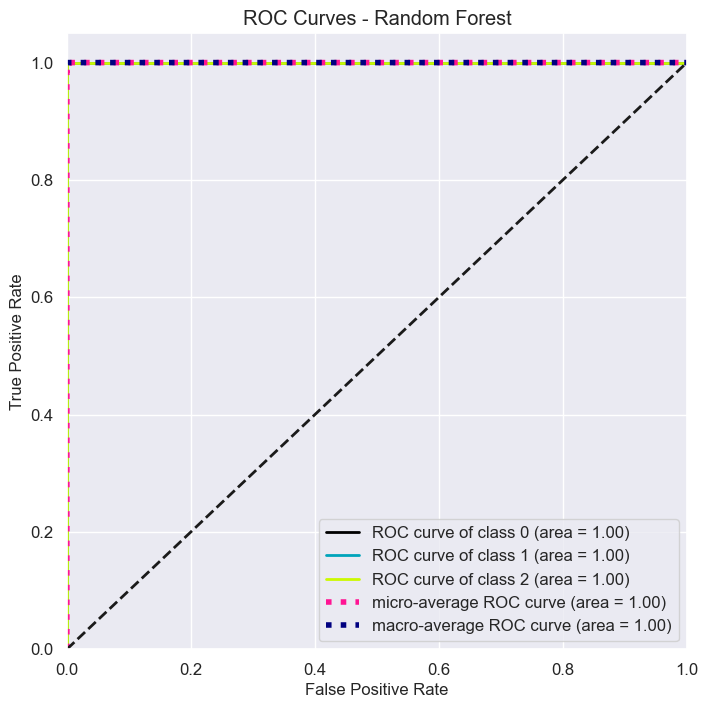

In [92]:
skplt.metrics.plot_roc(y_test, model2.predict_proba(X_test), 
                       title='ROC Curves - Random Forest')